In [5]:
import pandas as pd

# Load the dataset
file_path = "/Users/kathryndavis/Downloads/maternal_mortality.csv"
maternal_data = pd.read_csv(file_path)

# Clean data: Remove commas and decimals from relevant columns
maternal_data["Pregnancies"] = maternal_data["Pregnancies"].str.replace(",", "").astype(float)
maternal_data["Deaths"] = maternal_data["Deaths"].str.replace(",", "").astype(float)

# Calculate mortality rate
maternal_data["Mortality Rate"] = maternal_data["Deaths"] / maternal_data["Pregnancies"].where(maternal_data["Pregnancies"] != 0, other=1)

# Group by state and aggregate data
aggregated_df = maternal_data.groupby("STATE").agg({
    "Pregnancies": "sum",
    "Deaths": "sum",
    "Mortality Rate": "mean"  # Average mortality rate per state
}).reset_index()

# Sort DataFrame by mortality rate
aggregated_df = aggregated_df.sort_values(by="Mortality Rate", ascending=False)

# Print top five highest deaths with mortality rate
print("\nTop 5 states with highest maternal deaths and their mortality rate:")
display(aggregated_df.head()[["STATE", "Deaths", "Pregnancies", "Mortality Rate"]])

# Print top five lowest deaths with mortality rate
print("\nTop 5 states with lowest maternal deaths and their mortality rate:")
display(aggregated_df.tail()[["STATE", "Deaths", "Pregnancies", "Mortality Rate"]])



Top 5 states with highest maternal deaths and their mortality rate:


,STATE,Deaths,Pregnancies,Mortality Rate
2,Arkansas,63.0,144827.59,0.000435
18,Mississippi,62.0,144186.05,0.000430
31,Tennessee,134.0,321342.93,0.000417
0,Alabama,96.0,231884.06,0.000414
13,Louisiana,91.0,233333.33,0.000390



Top 5 states with lowest maternal deaths and their mortality rate:


,STATE,Deaths,Pregnancies,Mortality Rate
15,Massachusetts,42.0,274509.80,0.000153
4,Colorado,38.0,250000.00,0.000152
17,Minnesota,33.0,261904.76,0.000126
37,Wisconsin,29.0,250000.00,0.000116
3,California,176.0,1742574.26,0.000101


In [19]:
import pandas as pd

# Load the dataset
file_path = "/Users/kathryndavis/Downloads/data-table.csv"
infant_data = pd.read_csv(file_path)

# Convert 'RATE' to numeric, coerce errors to NaN
infant_data['RATE'] = pd.to_numeric(infant_data['RATE'], errors='coerce')

# Drop rows with NaN values
infant_data.dropna(subset=['RATE', 'DEATHS'], inplace=True)

# Group by state and aggregate data
aggregated_df = infant_data.groupby('STATE').agg({
    'RATE': 'mean',  # Average mortality rate per state
    'DEATHS': 'sum'  # Total deaths per state
}).reset_index()

# Sort DataFrame by deaths in descending order
aggregated_df = aggregated_df.sort_values(by='DEATHS', ascending=False)

# Print top five highest deaths with mortality rate
print("\nTop 5 states with highest infant deaths and their mortality rate:")
display(aggregated_df.head()[['STATE', 'DEATHS', 'RATE']])

# Print top five lowest deaths with mortality rate
print("\nTop 5 states with lowest infant deaths and their mortality rate:")
display(aggregated_df.tail()[['STATE', 'DEATHS', 'RATE']])

# Save the aggregated DataFrame as a CSV
aggregated_df.to_csv("aggregated_infant_mortality_data.csv", encoding="utf-8", index=False)


Top 5 states with highest infant deaths and their mortality rate:


,STATE,DEATHS,RATE
32,Texas,2337,5.85
3,California,2173,4.32
6,Florida,1344,6.11
24,New York,1102,4.62
8,Illinois,1043,6.58



Top 5 states with lowest infant deaths and their mortality rate:


,STATE,DEATHS,RATE
21,Nevada,198,5.52
10,Iowa,189,4.76
5,Connecticut,175,4.82
20,Nebraska,136,5.08
23,New Mexico,136,5.22


In [15]:
import pandas as pd

# Load the datasets
infant_file_path = "/Users/kathryndavis/Downloads/data-table.csv"
maternal_file_path = "/Users/kathryndavis/Downloads/maternal_mortality.csv"

# Read CSV files into dataframes
infant_df = pd.read_csv(infant_file_path)
maternal_df = pd.read_csv(maternal_file_path)

# Data cleaning and processing for infant DataFrame
infant_df['Infant Mortality Rate'] = infant_df['RATE']

# Data cleaning and processing for maternal DataFrame
maternal_df['Deaths'] = pd.to_numeric(maternal_df['Deaths'], errors='coerce')
maternal_df['Pregnancies'] = pd.to_numeric(maternal_df['Pregnancies'], errors='coerce')

# Filter out rows with NaN values in 'Deaths' and 'Pregnancies' columns
maternal_df = maternal_df.dropna(subset=['Deaths', 'Pregnancies'])

# Calculate maternal mortality rate
maternal_df['Maternal Mortality Rate'] = maternal_df['Deaths'] / maternal_df['Pregnancies']

# Merge DataFrames based on the state column
merged_df = pd.merge(infant_df, maternal_df, on='STATE', how='inner')

# Select the columns containing the state name, infant mortality rate, and maternal mortality rate
selected_columns = ['STATE', 'Infant Mortality Rate', 'Maternal Mortality Rate']

# Create a new DataFrame with selected columns
result_df = merged_df[selected_columns]

# Save the resulting DataFrame to a new CSV file
result_df.to_csv("infant_maternal_mortality_rates.csv", index=False)

In [18]:
import pandas as pd

# Read CSV file into a DataFrame
file_path = "/Users/kathryndavis/Downloads/infant_maternal_mortality_rates.csv"
df = pd.read_csv(file_path)

# Divide the values in the "Maternal Mortality Rate" column by 100
df['Maternal Mortality Rate'] /= 10

# Display the DataFrame
print("Contents of the CSV file:")
display(df)

Contents of the CSV file:


,STATE,Infant Mortality Rate,Maternal Mortality Rate
0,Alabama,8.67,4.14
1,Arizona,6.10,3.14
2,Arkansas,7.48,4.35
3,California,4.32,1.01
4,Colorado,4.79,1.52
5,Connecticut,4.82,1.67
6,Florida,6.11,2.63
7,Georgia,7.52,3.39
8,Illinois,6.58,1.73
9,Indiana,7.08,3.11


###### 

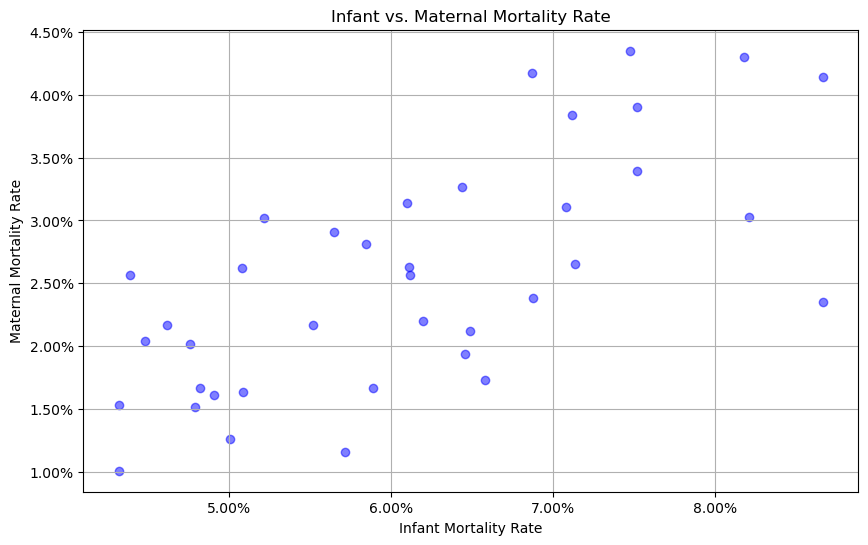

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Read the CSV file into a DataFrame
file_path = "/Users/kathryndavis/Downloads/infant_maternal_mortality_rates.csv"
df = pd.read_csv(file_path)

# Divide the values in the "Maternal Mortality Rate" and "Infant Mortality Rate" column to convert to precentages
df['Maternal Mortality Rate'] /= 1000
df['Infant Mortality Rate'] /= 100

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["Infant Mortality Rate"], df["Maternal Mortality Rate"], color='blue', alpha=0.5)
plt.title('Infant vs. Maternal Mortality Rate')
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Maternal Mortality Rate')

# Format tick labels as percentages
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.grid(True)
plt.show()



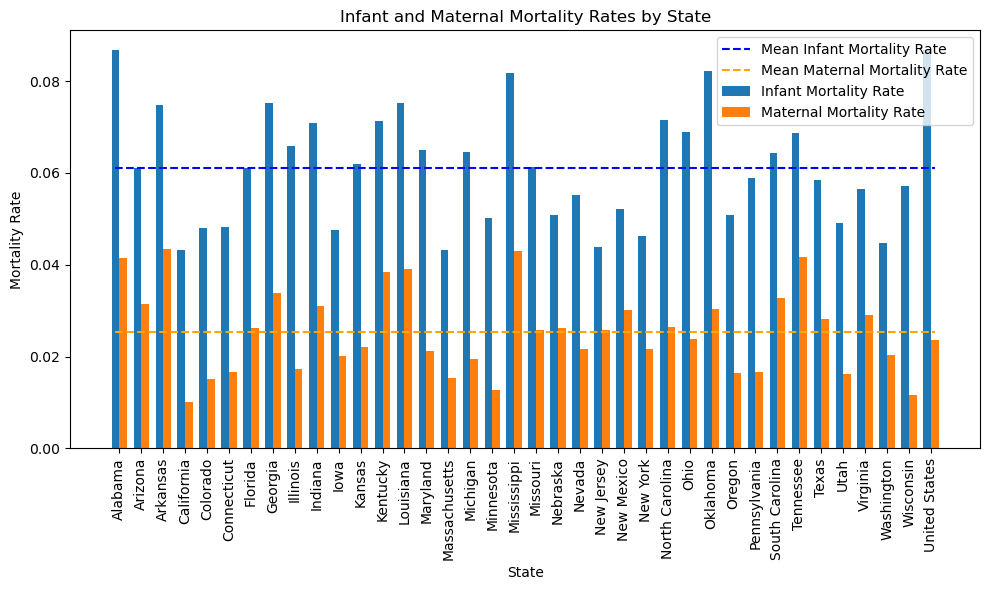

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
file_path = "/Users/kathryndavis/Downloads/infant_maternal_mortality_rates.csv"
df = pd.read_csv(file_path)

# Divide the values in the "Maternal Mortality Rate" and "Infant Mortality Rate" column to convert to percentages
df['Maternal Mortality Rate'] /= 1000
df['Infant Mortality Rate'] /= 100

# Calculate mean mortality rates
mean_infant_rate = df["Infant Mortality Rate"].mean()
mean_maternal_rate = df["Maternal Mortality Rate"].mean()

# Bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = df.index
plt.bar(index - bar_width/2, df["Infant Mortality Rate"], bar_width, label='Infant Mortality Rate')
plt.bar(index + bar_width/2, df["Maternal Mortality Rate"], bar_width, label='Maternal Mortality Rate')
plt.plot([index[0] - bar_width/2, index[-1] + bar_width/2], [mean_infant_rate, mean_infant_rate], color='blue', linestyle='--', label='Mean Infant Mortality Rate')
plt.plot([index[0] - bar_width/2, index[-1] + bar_width/2], [mean_maternal_rate, mean_maternal_rate], color='orange', linestyle='--', label='Mean Maternal Mortality Rate')
plt.xlabel('State')
plt.ylabel('Mortality Rate')
plt.title('Infant and Maternal Mortality Rates by State')
plt.xticks(index, df["STATE"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [60]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path = "/Users/kathryndavis/Downloads/infant_maternal_mortality_rates.csv"
df = pd.read_csv(file_path)

# Divide the maternal mortality rate by ten
df['Maternal Mortality Rate'] /= 10

# Remove the "United States" row from the DataFrame
df = df[df['STATE'] != 'United States']

# Sort DataFrame by Infant Mortality Rate in descending order
df_sorted = df.sort_values(by='Infant Mortality Rate', ascending=False)

# Select top five states with highest infant mortality rates
top_ten_states = df_sorted.head(10)

# Print out the top five states with highest infant mortality rates
print("Top 10 States with Highest Infant Mortality Rates:")
display(top_ten_states[['STATE', 'Infant Mortality Rate', 'Maternal Mortality Rate']])


Top 10 States with Highest Infant Mortality Rates:


,STATE,Infant Mortality Rate,Maternal Mortality Rate
0,Alabama,8.67,4.14
27,Oklahoma,8.21,3.03
18,Mississippi,8.18,4.30
7,Georgia,7.52,3.39
13,Louisiana,7.52,3.90
2,Arkansas,7.48,4.35
25,North Carolina,7.14,2.65
12,Kentucky,7.12,3.84
9,Indiana,7.08,3.11
26,Ohio,6.88,2.38


In [61]:
# Sort DataFrame by Maternal Mortality Rate in descending order
df_sorted = df.sort_values(by='Maternal Mortality Rate', ascending=False)

# Select top ten states with highest maternal mortality rates
top_ten_states = df_sorted.head(10)

# Print out the top ten states with highest maternal mortality rates
print("Top 10 States with Highest Maternal Mortality Rates:")
display(top_ten_states[['STATE', 'Maternal Mortality Rate', 'Infant Mortality Rate']])


Top 10 States with Highest Maternal Mortality Rates:


,STATE,Maternal Mortality Rate,Infant Mortality Rate
2,Arkansas,4.35,7.48
18,Mississippi,4.30,8.18
31,Tennessee,4.17,6.87
0,Alabama,4.14,8.67
13,Louisiana,3.90,7.52
12,Kentucky,3.84,7.12
7,Georgia,3.39,7.52
30,South Carolina,3.27,6.44
1,Arizona,3.14,6.10
9,Indiana,3.11,7.08


In [62]:
# Divide the maternal mortality rate by ten
df['Maternal Mortality Rate'] /= 10

# Remove the "United States" row from the DataFrame
df = df[df['STATE'] != 'United States']

# Sort DataFrame by Infant Mortality Rate in descending order
df_sorted_infant = df.sort_values(by='Infant Mortality Rate', ascending=False)

# Select top ten states with highest infant mortality rates
top_ten_infant = df_sorted_infant.head(10)

# Sort DataFrame by Maternal Mortality Rate in descending order
df_sorted_maternal = df.sort_values(by='Maternal Mortality Rate', ascending=False)

# Select top ten states with highest maternal mortality rates
top_ten_maternal = df_sorted_maternal.head(10)

# Find common states between top ten infant and maternal mortality rates
common_states = pd.merge(top_ten_infant, top_ten_maternal, on='STATE', how='inner')

# Print out the common states
print("Common States with Top 10 Highest Infant and Maternal Mortality Rates:")
display(common_states[['STATE', 'Infant Mortality Rate_x', 'Maternal Mortality Rate_y']])

Common States with Top 10 Highest Infant and Maternal Mortality Rates:


,STATE,Infant Mortality Rate_x,Maternal Mortality Rate_y
0,Alabama,8.67,0.414
1,Mississippi,8.18,0.430
2,Georgia,7.52,0.339
3,Louisiana,7.52,0.390
4,Arkansas,7.48,0.435
5,Kentucky,7.12,0.384
6,Indiana,7.08,0.311


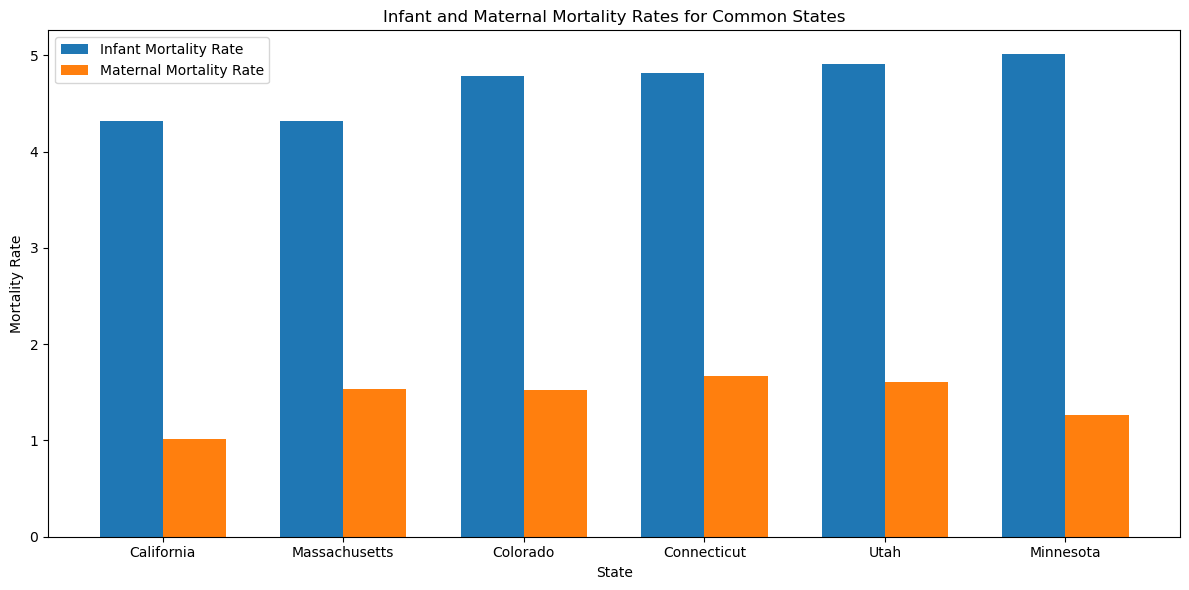

In [52]:
# Plotting bar graph for common states
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = common_states.index
plt.bar(index, common_states["Infant Mortality Rate_x"], bar_width, label='Infant Mortality Rate')
plt.bar(index + bar_width, common_states["Maternal Mortality Rate_y"], bar_width, label='Maternal Mortality Rate')
plt.xlabel('State')
plt.ylabel('Mortality Rate')
plt.title('Infant and Maternal Mortality Rates for Common States')
plt.xticks(index + bar_width / 2, common_states["STATE"])
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
file_path = "/Users/kathryndavis/Downloads/infant_maternal_mortality_rates.csv"
df = pd.read_csv(file_path)

# Divide the maternal mortality rate by ten
df['Maternal Mortality Rate'] /= 10

# Remove the "United States" row from the DataFrame
df = df[df['STATE'] != 'United States']

# Sort DataFrame by Infant Mortality Rate in ascending order
df_sorted_infant = df.sort_values(by='Infant Mortality Rate', ascending=True)

# Select bottom ten states with lowest infant mortality rates
bottom_ten_infant = df_sorted_infant.head(10)

# Sort DataFrame by Maternal Mortality Rate in ascending order
df_sorted_maternal = df.sort_values(by='Maternal Mortality Rate', ascending=True)

# Select bottom ten states with lowest maternal mortality rates
bottom_ten_maternal = df_sorted_maternal.head(10)

# Find common states between bottom ten infant and maternal mortality rates
common_states = pd.merge(bottom_ten_infant, bottom_ten_maternal, on='STATE', how='inner')

# Print out the common states
print("Common States with Bottom 10 Lowest Infant and Maternal Mortality Rates:")
display(common_states[['STATE', 'Infant Mortality Rate_x', 'Maternal Mortality Rate_y']])

Common States with Bottom 10 Lowest Infant and Maternal Mortality Rates:


,STATE,Infant Mortality Rate_x,Maternal Mortality Rate_y
0,California,4.32,1.01
1,Massachusetts,4.32,1.53
2,Colorado,4.79,1.52
3,Connecticut,4.82,1.67
4,Utah,4.91,1.61
5,Minnesota,5.01,1.26


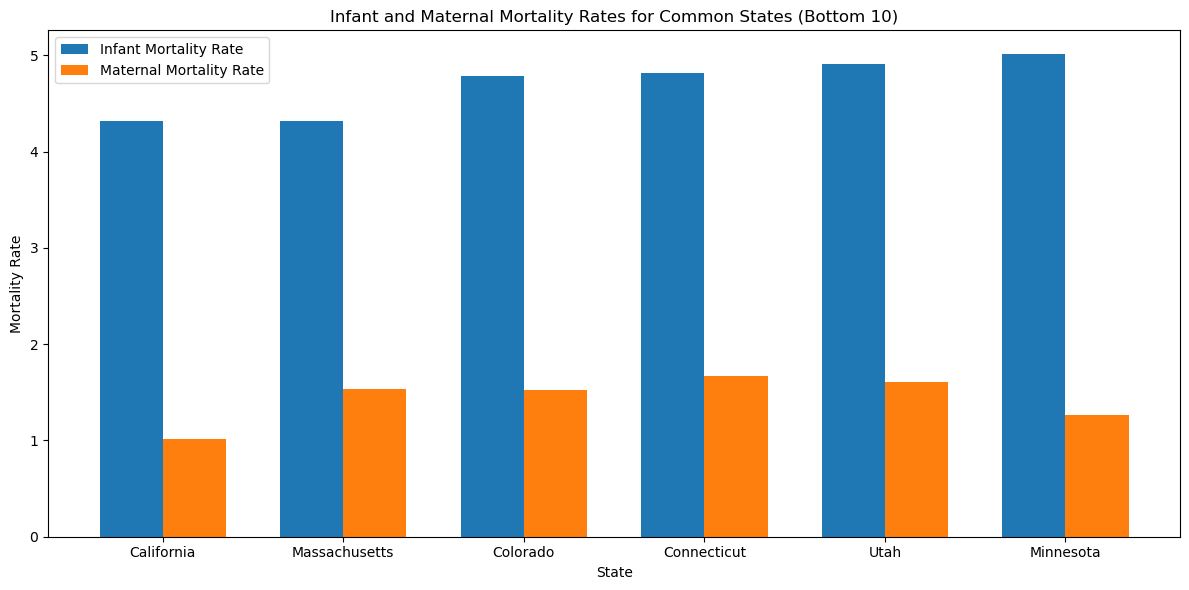

In [51]:
# Plotting bar graph for common states
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = common_states.index
plt.bar(index, common_states["Infant Mortality Rate_x"], bar_width, label='Infant Mortality Rate')
plt.bar(index + bar_width, common_states["Maternal Mortality Rate_y"], bar_width, label='Maternal Mortality Rate')
plt.xlabel('State')
plt.ylabel('Mortality Rate')
plt.title('Infant and Maternal Mortality Rates for Common States (Bottom 10)')
plt.xticks(index + bar_width / 2, common_states["STATE"])
plt.legend()
plt.tight_layout()
plt.show()